In [1]:
# %config InlineBackend.figure_formats = ['png']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
#sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [3]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [4]:
%load_ext autoreload
%autoreload 2


In [5]:
import seaborn_figure_settings

In [6]:
save_dpath = os.path.join('../notebooks/figures/', 'EXFig7')
os.makedirs(save_dpath,exist_ok=True)

In [7]:
import sys
sys.path.append('..')
import multimodel_venn
from model_equations_separate_NC_store_numba import *

In [8]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [9]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6', ]# '#d6d4a0',]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [10]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [11]:
morder

['EXOENZYME', 'OVERFLOW', 'ROS', 'MIXOTROPH']

In [12]:
mmap = {
    'EXOENZYME' : 'E', 
    'EXOENZYME-MIXOTROPH' : 'EM' , 
    'EXOENZYME-ROS' : 'ER',
       'EXOENZYME-ROS-MIXOTROPH' : 'ERM', 
    'MIN' : '-', 
    'MIXOTROPH' : 'M',
    'OVERFLOW' : 'O',
       'OVERFLOW-EXOENZYME' : 'EO',
    'OVERFLOW-EXOENZYME-MIXOTROPH' : 'EOM',
       'OVERFLOW-MIXOTROPH' : 'OM',
    'OVERFLOW-ROS' : 'OR', 
    'OVERFLOW-ROS-EXOENZYME' : 'EOR',
       'OVERFLOW-ROS-MIXOTROPH' : 'ORM', 
    'ROS' : 'R', 
    'ROS-MIXOTROPH' : 'RM',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME' : 'EORM',
}

In [13]:
import os
import glob
dpath = '../results/final/het/'
#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [14]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
pred_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'predicted_classes_*'))], ignore_index=True)


../results/final/het/predicted_classes_monte_het_extend_EXOENZYME.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_100per_vpro_OVERFLOW-ROS.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_EXOENZYME-ROS-MIXOTROPH.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv.gz extend
../results/final/het/predicted_classes_monte_het_round2_100per_vpro_ROS.csv.gz round2
../results/final/het/predicted_classes_monte_het_extend_100per_vpro_EXOENZYME-MIXOTROPH.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_ROS.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_OVERFLOW.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_EXOENZYME-ROS.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_OVERFLOW-EXOENZYME.csv.gz extend
../results/final/het/predicted_classes_monte_het_extend_100per_vpro_ROS.csv.gz extend
../results/final/het/predicted_c

In [15]:
pred_df.head()

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,RMSE_filled,Phase,Unnamed: 0
0,monte_extend_EXOENZYME_100_monte_vpro_3_12_88_...,Neutral,0.986919,monte_extend_EXOENZYME_100_monte_vpro_3_12_88_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_3_12_88_EXOENZYME_C2__53_EXOENZYME,1B0,Axenic,Axenic,4.055543,60.995542,74.0,247.370029,247.370029,extend,NaN
1,monte_extend_EXOENZYME_100_monte_vpro_3_17_89_...,Neutral,0.985701,monte_extend_EXOENZYME_100_monte_vpro_3_17_89_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_3_17_89_EXOENZYME_C2__19_EXOENZYME,1A0,Axenic,Axenic,8.186967,56.577827,74.0,463.200790,463.200790,extend,NaN
2,monte_extend_EXOENZYME_100_monte_vpro_3_19_83_...,Weak,0.729108,monte_extend_EXOENZYME_100_monte_vpro_3_19_83_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_3_19_83_EXOENZYME_C1__49_EXOENZYME,11A0,Roseovarius 5C3,Weak,3.719847,27.728271,74.0,103.144926,103.144926,extend,NaN
3,monte_extend_EXOENZYME_100_monte_vpro_3_23_67_...,Sustained,0.579614,monte_extend_EXOENZYME_100_monte_vpro_3_23_67_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_3_23_67_EXOENZYME_C3__91_EXOENZYME,7A0,Sulfitobacter pseudonitzschiae,Sustained,13.904705,136.891820,74.0,1903.440428,1903.440428,extend,NaN
4,monte_extend_EXOENZYME_100_monte_vpro_3_23_76_...,Sustained,0.990820,monte_extend_EXOENZYME_100_monte_vpro_3_23_76_...,lowN,all,EXOENZYME,h8519271514136708373,vpro_3_23_76_EXOENZYME_C2__57_EXOENZYME,7A0,Sulfitobacter pseudonitzschiae,Sustained,9.477592,66.568479,74.0,630.908850,630.908850,extend,NaN


In [16]:
pred_df.VPRO = pred_df.VPRO.str.replace('_monte_', '' ,regex=False)

In [17]:
vpro_df = pd.read_csv('../ML_model/versatile_vpros.csv')

In [18]:
pred_df.columns, vpro_df.columns

(Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
        'hash', 'VPRO', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
        'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'RMSE_filled', 'Phase',
        'Unnamed: 0'],
       dtype='object'),
 Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
        'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
        'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'EXOENZYME',
        'OVERFLOW', 'ROS', 'MIXOTROPH', 'MIN', '% positive', 'Versatile_STR_'],
       dtype='object'))

In [19]:
pred_df = pd.merge(pred_df, vpro_df[['VPRO', 'Versatile']], on='VPRO')

In [20]:
pred_df.Versatile.isna().sum()

0

In [21]:
pred_df['MODEL'] = pred_df['model'].map(mmap)

In [22]:
for m in morder:
    pred_df[m] = pred_df.model.str.contains(m)

In [23]:
pred_df[['MODEL', 'y_pred']].value_counts()

MODEL  y_pred   
EOM    Neutral      61691
OM     Neutral      56449
EO     Neutral      54900
O      Neutral      46309
       Weak         44451
                    ...  
-      Inhibited       16
ER     Inhibited       14
M      Sustained       12
EO     Inhibited       11
EOR    Inhibited       10
Name: count, Length: 92, dtype: int64

/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decora

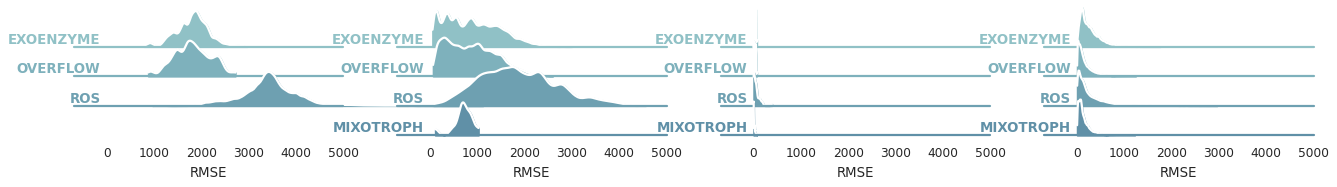

In [24]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    pred_df.loc[pred_df.model.isin(morder)], 
    row="model", hue="model", row_order=morder, hue_order=morder, aspect=10, height=.5, palette=pal, col='y_pred', col_order=gorder[:4],
    sharey=False,
)

# Draw the densities in a few steps
g.map(sns.kdeplot, "RMSE",
      bw_adjust=.5, clip_on=False, cut=0, common_norm=False,
      fill=True, alpha=1, linewidth=1.5, )
g.map(sns.kdeplot, "RMSE", clip_on=False, color="w", lw=2, bw_adjust=.5, cut=0, common_norm=False,)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.1, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "model")

g.set(xlim=(-700, 5000))
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles(template='')
g.set(yticks=[], ylabel="", xlabel='RMSE')
g.despine(bottom=True, left=True)

/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decora

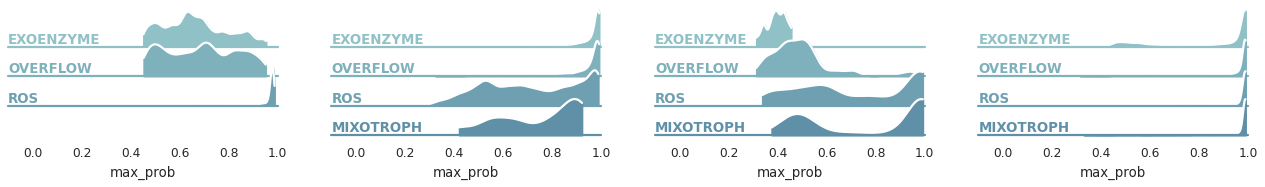

In [25]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    pred_df.loc[pred_df.model.isin(morder)], 
    row="model", hue="model", row_order=morder, hue_order=morder, aspect=10, height=.5, palette=pal, col='y_pred', col_order=gorder[:4],
    sharey=False,
)

# Draw the densities in a few steps
g.map(sns.kdeplot, "max_prob",
      bw_adjust=.5, clip_on=False, cut=0, common_norm=False,
      fill=True, alpha=1, linewidth=1.5, )
g.map(sns.kdeplot, "max_prob", clip_on=False, color="w", lw=2, bw_adjust=.5, cut=0, common_norm=False,)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "model")

g.set(xlim=(-0.1, 1))
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles(template='')
g.set(yticks=[], ylabel="", xlabel='max_prob')
g.despine(bottom=True, left=True)

/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decora

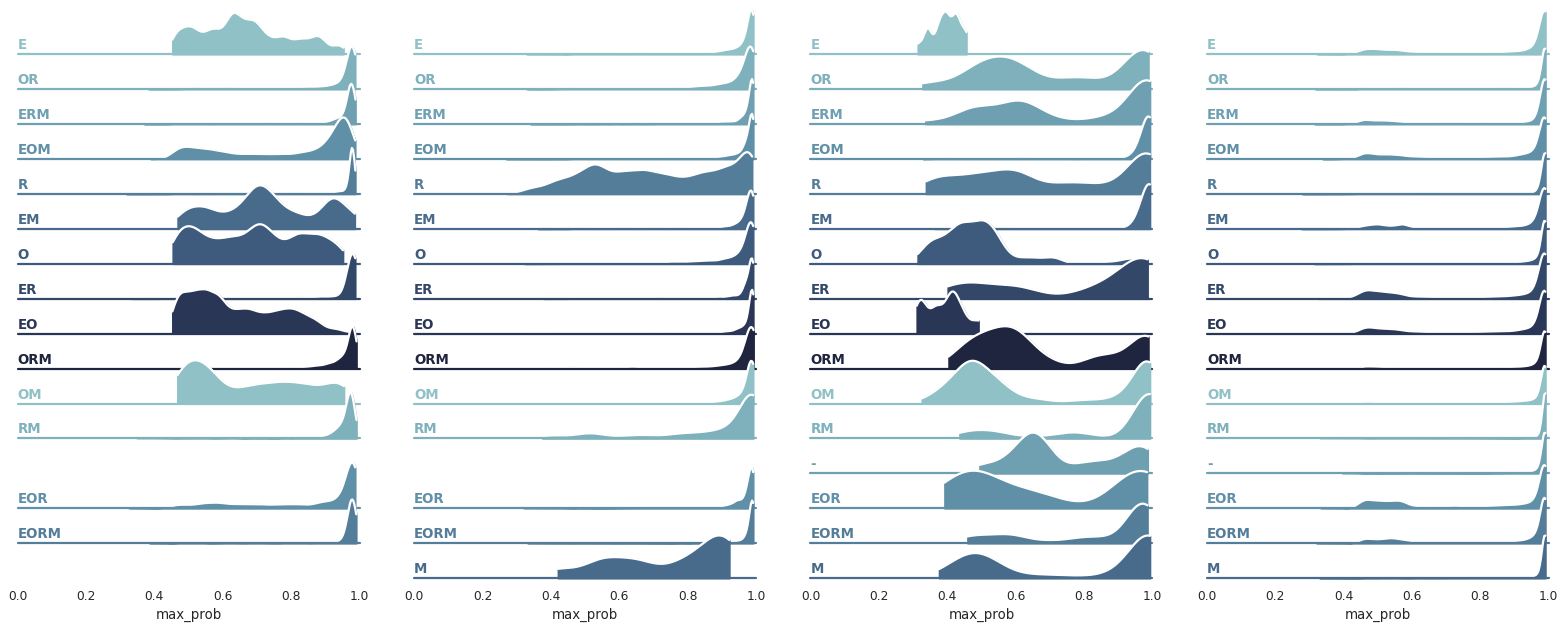

In [26]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    pred_df, 
    row="MODEL", hue="MODEL",  aspect=10, height=.5, palette=pal, col='y_pred', col_order=gorder[:4],
    sharey=False,
)

# Draw the densities in a few steps
g.map(sns.kdeplot, "max_prob",
      bw_adjust=.5, clip_on=False, cut=0, common_norm=False,
      fill=True, alpha=1, linewidth=1.5, )
g.map(sns.kdeplot, "max_prob", clip_on=False, color="w", lw=2, bw_adjust=.5, cut=0, common_norm=False,)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "MODEL")

g.set(xlim=(0, 1))
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles(template='')
g.set(yticks=[], ylabel="", xlabel='max_prob')
g.despine(bottom=True, left=True)

/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decora

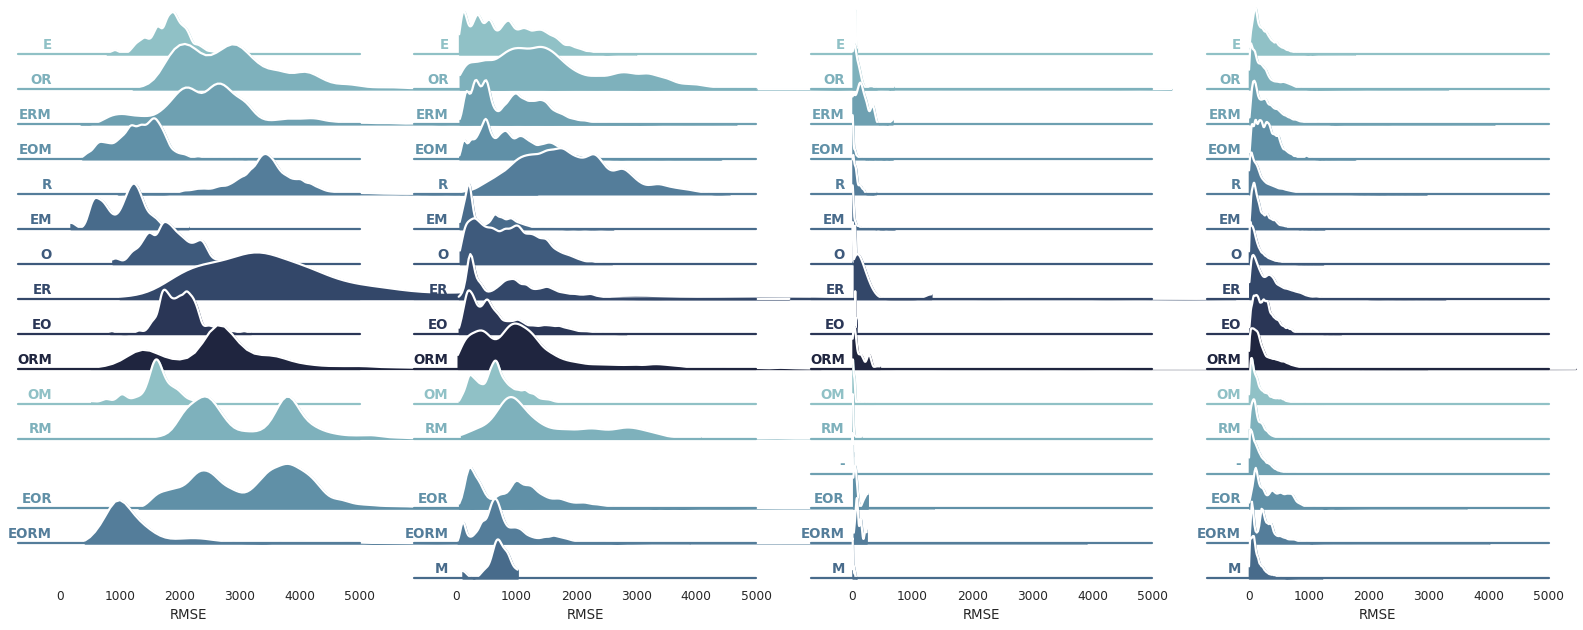

In [27]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    pred_df, 
    row="MODEL", hue="MODEL", #row_order=morder, hue_order=morder, 
    aspect=10, height=.5, palette=pal, col='y_pred', col_order=gorder[:4],
    sharey=False,
)

# Draw the densities in a few steps
g.map(sns.kdeplot, "RMSE",
      bw_adjust=.5, clip_on=False, cut=0, common_norm=False,
      fill=True, alpha=1, linewidth=1.5, )
g.map(sns.kdeplot, "RMSE", clip_on=False, color="w", lw=2, bw_adjust=.5, cut=0, common_norm=False,)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.1, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, "MODEL")

g.set(xlim=(-700, 5000))
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles(template='')
g.set(yticks=[], ylabel="", xlabel='RMSE')
g.despine(bottom=True, left=True)

In [28]:
pred_df.loc[pred_df.y_pred.isin(['Strong', 'Sustained'])].groupby(['MODEL', 'y_pred']).max_prob.describe()

count      mean       std       min       25%       50%  \
MODEL y_pred                                                                 
E     Strong      1003.0  0.666199  0.130638  0.452449  0.565909  0.652028   
      Sustained  13101.0  0.910196  0.131810  0.329112  0.902983  0.975259   
EM    Strong        82.0  0.733105  0.148918  0.467887  0.631412  0.715477   
      Sustained   3924.0  0.933498  0.112007  0.360977  0.947369  0.979050   
EO    Strong       882.0  0.640771  0.131703  0.452462  0.528714  0.608560   
      Sustained  18743.0  0.936393  0.107892  0.335875  0.945374  0.983154   
EOM   Strong      1629.0  0.790506  0.182308  0.389232  0.601228  0.884739   
      Sustained  21806.0  0.929882  0.112384  0.268766  0.934683  0.977899   
EOR   Strong      3200.0  0.840586  0.172686  0.325403  0.701826  0.939892   
      Sustained  17218.0  0.925086  0.116706  0.320492  0.929749  0.977115   
EORM  Strong      2020.0  0.933071  0.115198  0.385074  0.968664  0.976718   
      Sustained  14920.0  0.944818  0.109347  0.331803  0.970189  0.988003   
ER    Strong      1776.0  0.909297  0.140857  0.330872  0.926303  0.978816   
      Sustained  12265.0  0.940243  0.097946  0.377587  0.949233  0.979783   
ERM   Strong      3654.0  0.926206  0.110915  0.370053  0.937433  0.972062   
      Sustained  13799.0  0.944545  0.097005  0.340150  0.955314  0.981909   
M     Sustained     12.0  0.743457  0.173072  0.420733  0.614629  0.796158   
O     Strong       173.0  0.690484  0.146550  0.453515  0.559105  0.695611   
      Sustained   2388.0  0.906545  0.131651  0.323203  0.887021  0.971811   
OM    Strong        47.0  0.675879  0.162156  0.467204  0.533205  0.657390   
      Sustained   2509.0  0.926504  0.121336  0.329829  0.936069  0.981745   
OR    Strong      1469.0  0.910140  0.123356  0.382521  0.904158  0.973422   
      Sustained   1870.0  0.900360  0.140781  0.329085  0.882705  0.970445   
ORM   Strong      3600.0  0.922492  0.110443  0.345061  0.921198  0.970513   
      Sustained   1980.0  0.904704  0.150400  0.337153  0.906172  0.980803   
R     Strong     24348.0  0.930747  0.108518  0.318013  0.948681  0.977760   
      Sustained    899.0  0.717299  0.194005  0.271760  0.544939  0.713744   
RM    Strong      1719.0  0.931941  0.097125  0.348942  0.938774  0.968063   
      Sustained    110.0  0.871697  0.179202  0.374866  0.816630  0.984478   

                      75%       max  
MODEL y_pred                         
E     Strong     0.760262  0.953210  
      Sustained  0.988921  0.992397  
EM    Strong     0.868940  0.986212  
      Sustained  0.989081  0.992034  
EO    Strong     0.749683  0.982978  
      Sustained  0.990176  0.992405  
EOM   Strong     0.949768  0.987468  
      Sustained  0.989548  0.992362  
EOR   Strong     0.979799  0.987434  
      Sustained  0.989103  0.992075  
EORM  Strong     0.980925  0.990545  
      Sustained  0.990937  0.992079  
ER    Strong     0.980666  0.987431  
      Sustained  0.989750  0.991901  
ERM   Strong     0.979294  0.988296  
      Sustained  0.990868  0.992078  
M     Sustained  0.891521  0.922292  
O     Strong     0.817581  0.951717  
      Sustained  0.988508  0.992075  
OM    Strong     0.810214  0.954611  
      Sustained  0.990111  0.992076  
OR    Strong     0.979913  0.987432  
      Sustained  0.987050  0.992075  
ORM   Strong     0.980600  0.991191  
      Sustained  0.990288  0.993216  
R     Strong     0.979848  0.987825  
      Sustained  0.904246  0.988927  
RM    Strong     0.975234  0.991178  
      Sustained  0.990926  0.992056

In [29]:
pred_df.loc[pred_df.y_pred.isin(['Strong', 'Sustained'])].groupby(['MODEL', 'y_pred']).RMSE.describe()

count         mean          std          min          25%  \
MODEL y_pred                                                                   
E     Strong      1003.0  1814.641330   350.923305   784.014686  1610.004068   
      Sustained  13101.0   885.104594   560.586076    49.549434   397.121504   
EM    Strong        82.0  1029.990128   378.608871   180.904669   709.254281   
      Sustained   3924.0   521.308399   395.622140    57.808684   204.576243   
EO    Strong       882.0  1996.499430   342.408965   836.360143  1763.156179   
      Sustained  18743.0   746.558303   551.069527    45.149037   297.251243   
EOM   Strong      1629.0  1347.483886   457.972982   373.397108  1052.240979   
      Sustained  21806.0   924.787477   530.353991    53.289875   491.753424   
EOR   Strong      3200.0  3334.062665  1087.430225  1316.357868  2451.436382   
      Sustained  17218.0  1060.341066   809.654034    50.589576   376.087269   
EORM  Strong      2020.0  1520.119175  1216.769203   417.590466   920.596443   
      Sustained  14920.0   838.292956   517.310509    24.699485   525.873227   
ER    Strong      1776.0  4600.174491  2820.948735   995.016111  2878.406953   
      Sustained  12265.0   939.451842   626.879508    41.476403   326.145390   
ERM   Strong      3654.0  2589.007996  1077.963741   343.619853  2011.150127   
      Sustained  13799.0   919.006203   581.580755    59.983176   420.936376   
M     Sustained     12.0   687.650378   231.381571   106.761221   638.917956   
O     Strong       173.0  1824.551574   395.513050   878.795640  1516.478718   
      Sustained   2388.0   875.688478   522.922420    61.028808   422.678003   
OM    Strong        47.0  1562.325449   354.268060   525.926693  1477.541364   
      Sustained   2509.0   698.104358   376.242006    46.332665   408.527422   
OR    Strong      1469.0  3051.026932  1296.568742  1216.478041  2202.224676   
      Sustained   1870.0  1622.030432  1039.023830    61.529637   847.219749   
ORM   Strong      3600.0  2983.178508  1795.912313   508.380419  2099.881555   
      Sustained   1980.0  1173.553135   968.134028    27.330412   502.834732   
R     Strong     24348.0  3445.259559   617.699477   965.285702  3135.936255   
      Sustained    899.0  1866.544048   808.838706    67.101672  1263.892973   
RM    Strong      1719.0  3264.190665  1165.713515  1064.037262  2400.621308   
      Sustained    110.0  1501.050407   910.615035    83.054162   870.240259   

                         50%          75%           max  
MODEL y_pred                                             
E     Strong     1840.590510  2031.654638   2971.914822  
      Sustained   834.686049  1312.798054   3000.443582  
EM    Strong     1129.029863  1291.059619   2145.905019  
      Sustained   348.383696   785.607368   2623.962509  
EO    Strong     1986.656927  2193.417907   3186.374822  
      Sustained   568.383757  1068.868303   2842.212009  
EOM   Strong     1361.995126  1618.079027   3432.053816  
      Sustained   845.093455  1297.964461   4419.524748  
EOR   Strong     3430.262483  3965.610045  10321.827011  
      Sustained   987.240613  1409.275291   7961.111509  
EORM  Strong     1115.280311  1528.372683  17120.040371  
      Sustained   702.836393  1058.947688   3889.010966  
ER    Strong     3652.819368  5246.324959  19603.311163  
      Sustained   881.054749  1376.795879   5554.747625  
ERM   Strong     2504.539049  2933.308390  10927.900497  
      Sustained   887.895179  1327.104647   4674.668250  
M     Sustained   704.428330   839.635634   1023.194760  
O     Strong     1818.423138  2112.585482   2722.085984  
      Sustained   829.774889  1252.530950   2596.364647  
OM    Strong     1608.382455  1750.682184   2244.546130  
      Sustained   654.725534   913.512460   2190.368475  
OR    Strong     2838.302556  3509.008444  18535.230184  
      Sustained  1411.536845  2309.784107   5009.132159  
ORM   Strong     2684.147692  3296.729333  25277.957786  
      Sustained   969.552436  

In [30]:
pred_df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
       'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'RMSE_filled', 'Phase',
       'Unnamed: 0', 'Versatile', 'MODEL', 'EXOENZYME', 'OVERFLOW', 'ROS',
       'MIXOTROPH'],
      dtype='object')

In [31]:
#sns.set_context('poster')

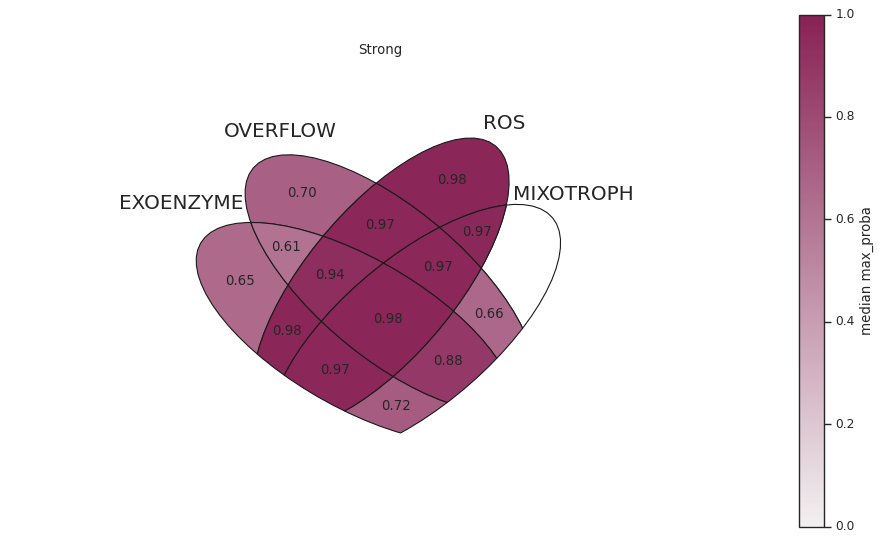

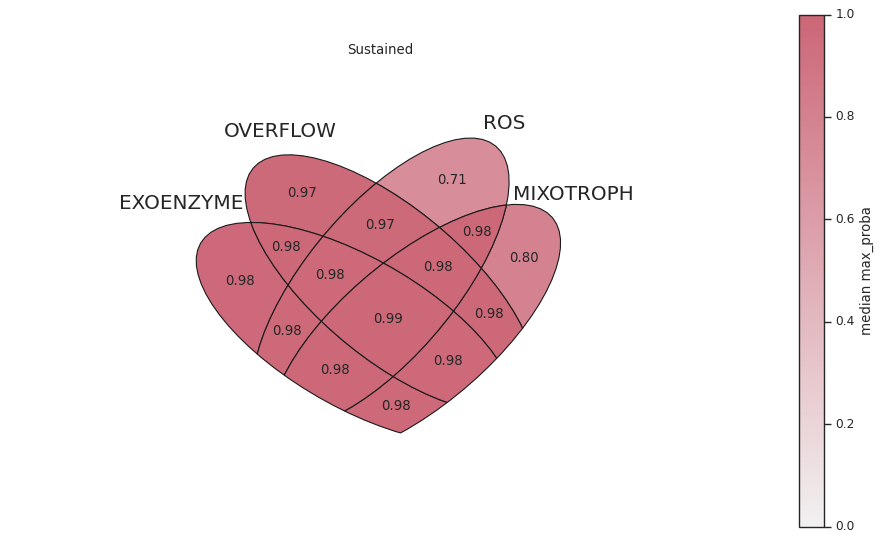

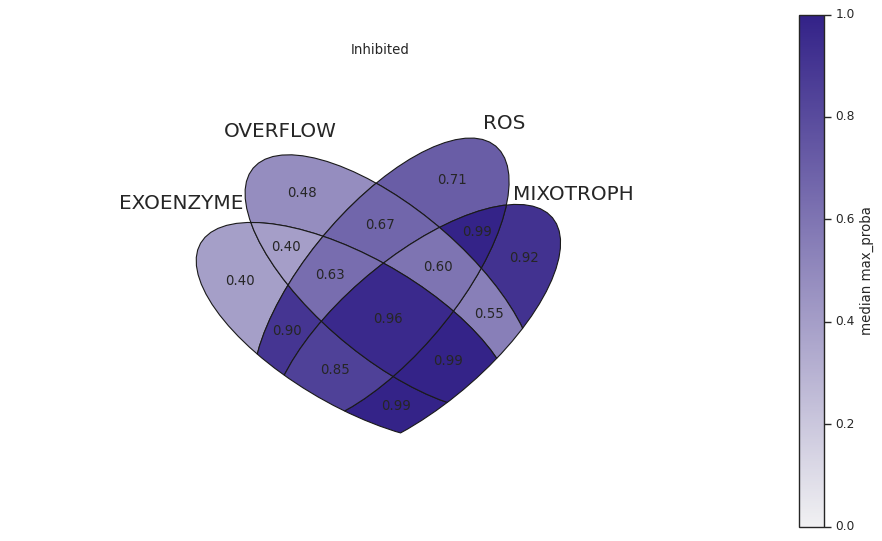

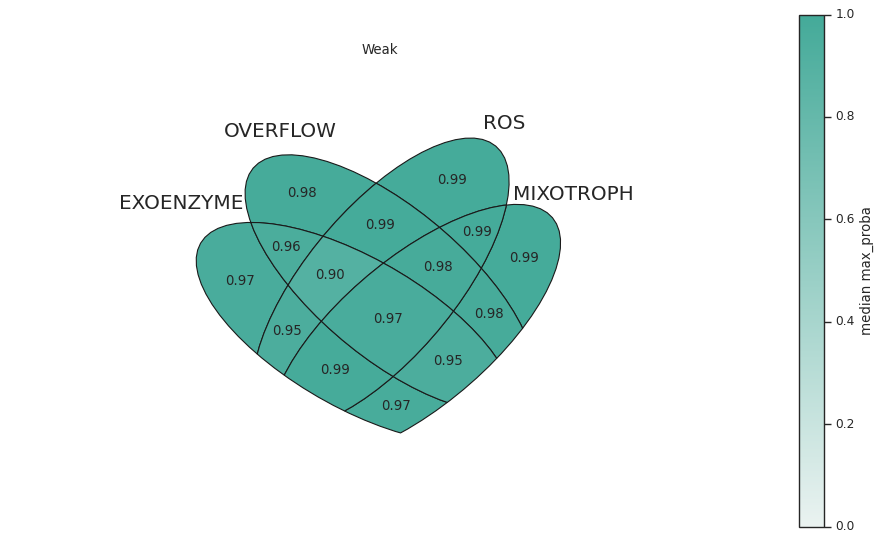

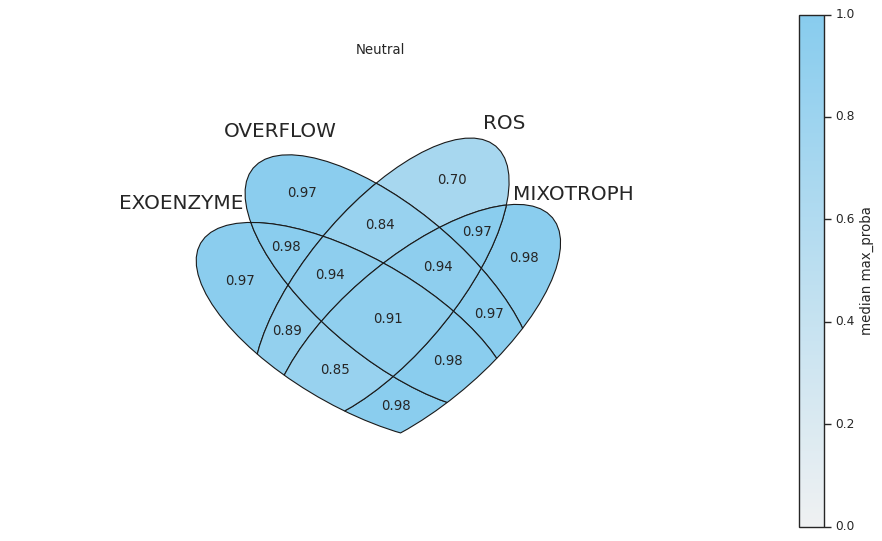

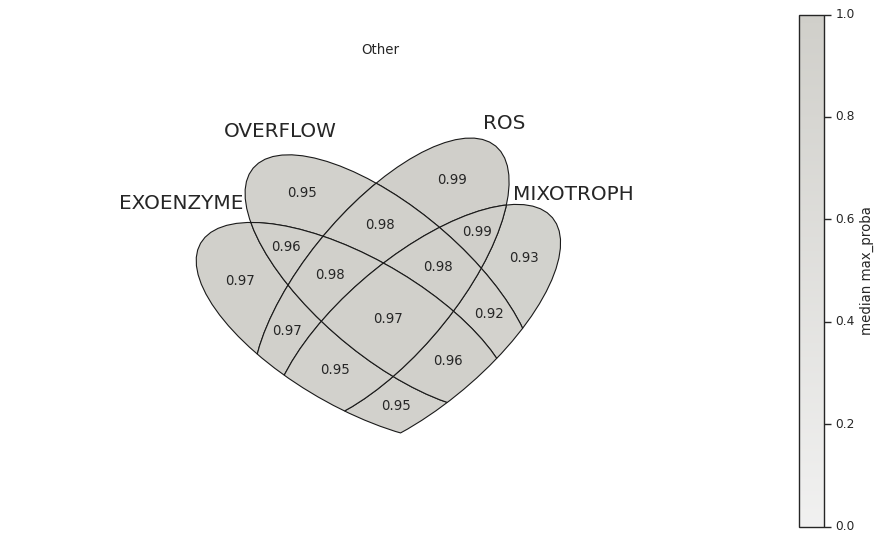

In [32]:
for i,c  in zip(gorder, gpalette):
    data_dict = pred_df.loc[pred_df.y_pred.isin([i])].groupby(morder)['max_prob'].median() 
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True), 
        data_dict=data_dict, vmin=0, vmax=1, 
        cbar_label=f'median max_proba',
        annfmt='.2f'
    )
    plt.title(i)
    plt.show()

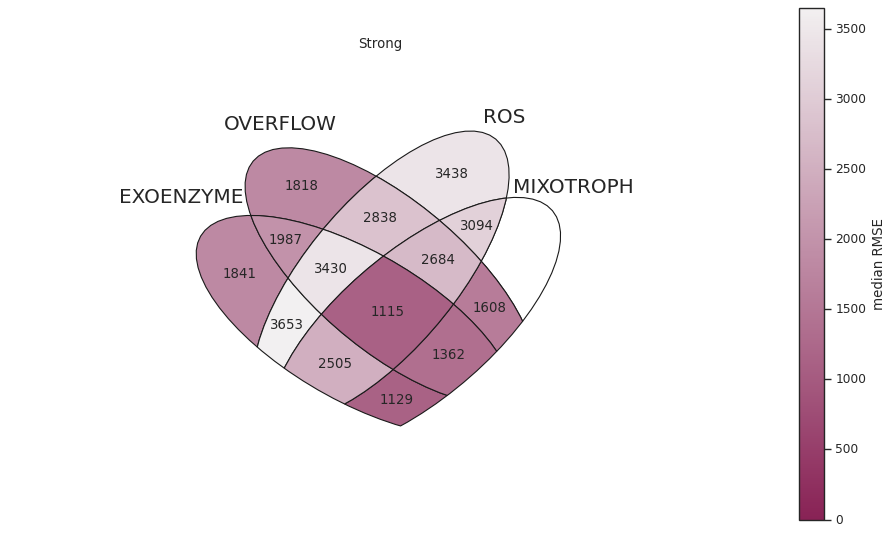

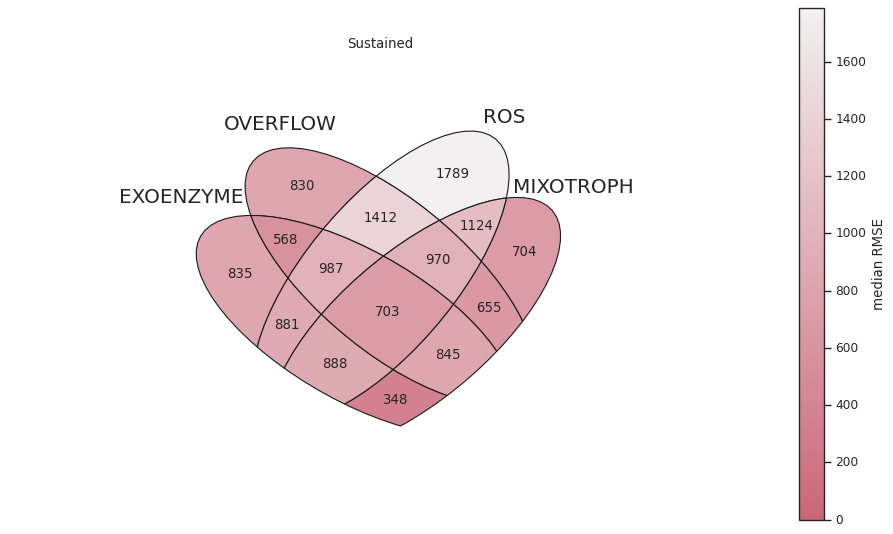

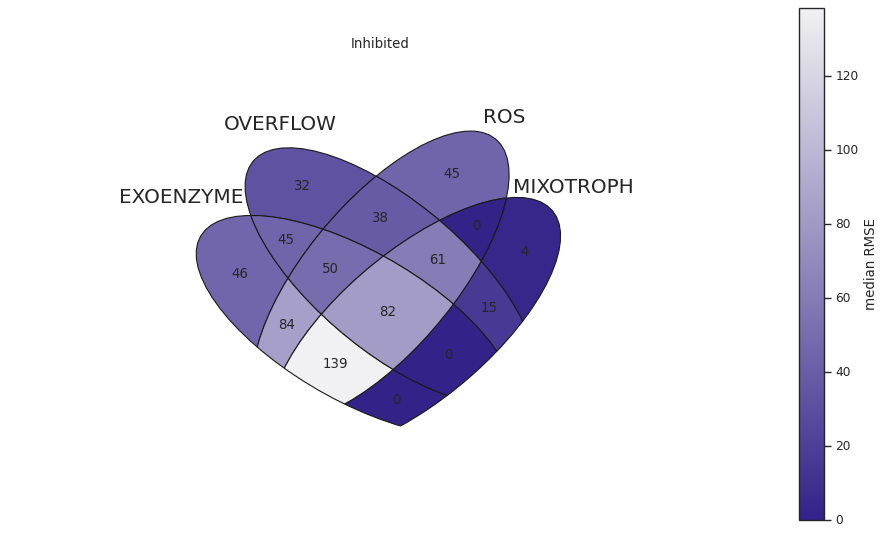

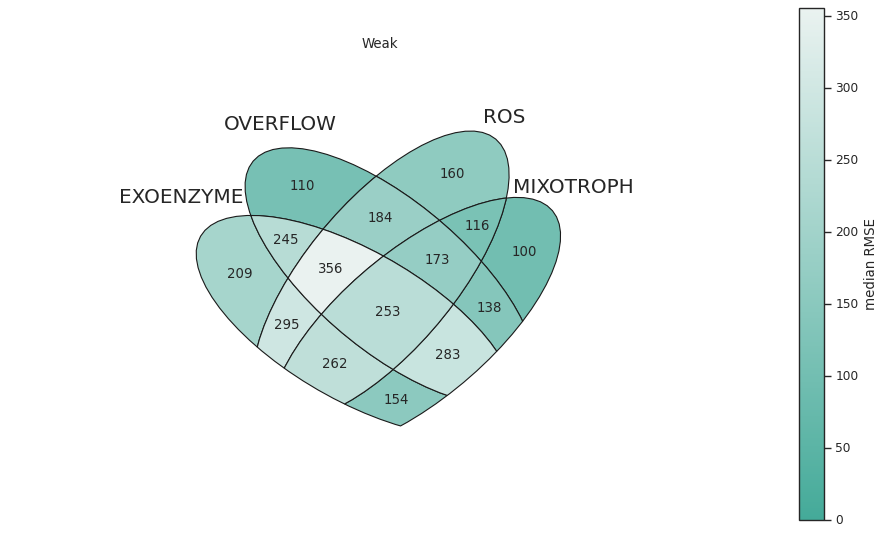

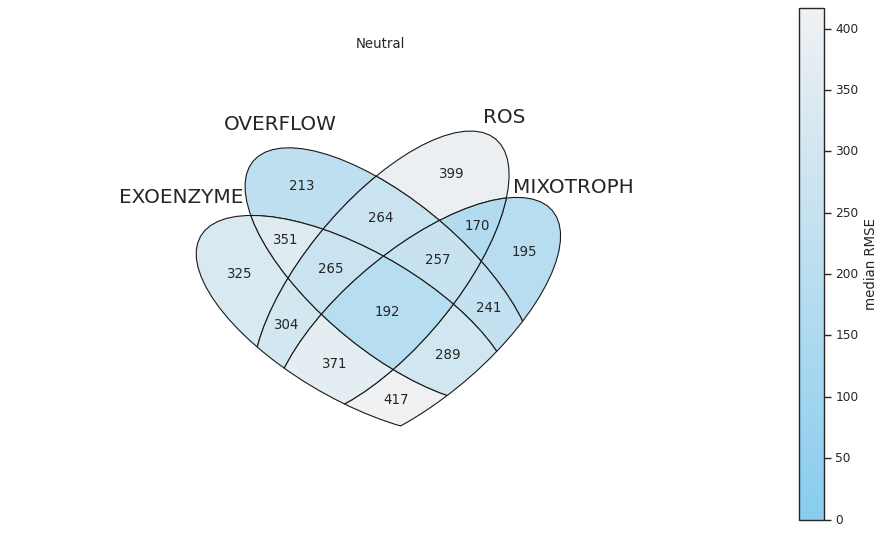

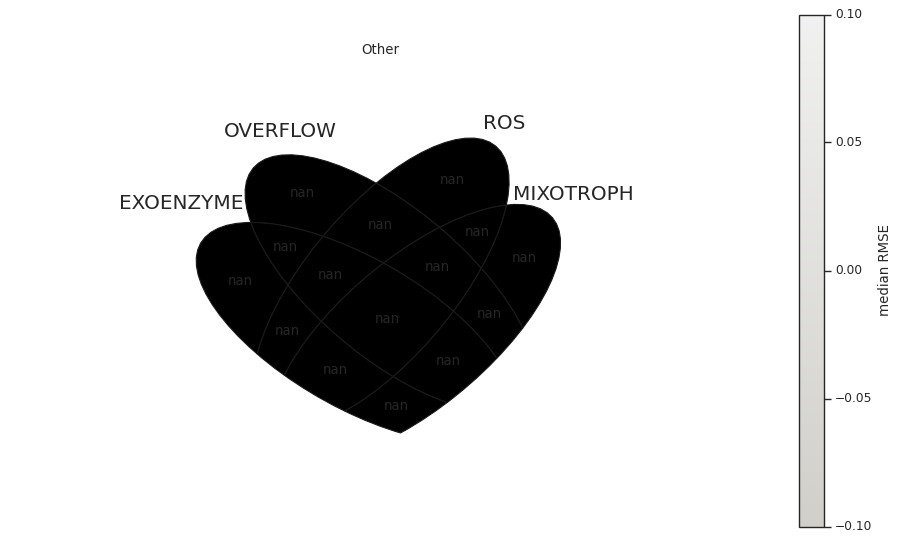

In [33]:
for i,c  in zip(gorder, gpalette):
    data_dict = pred_df.loc[pred_df.y_pred.isin([i])].groupby(morder)['RMSE'].median() 
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True, reverse=True), 
        data_dict=data_dict, vmin=0, #vmax=1, 
        cbar_label=f'median RMSE',
        annfmt='.0f'
    )
    plt.title(i)
    plt.show()

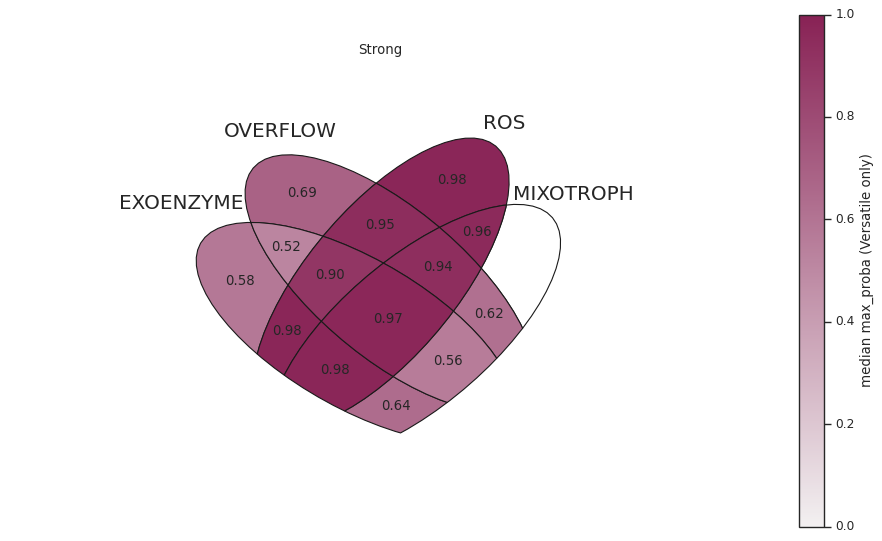

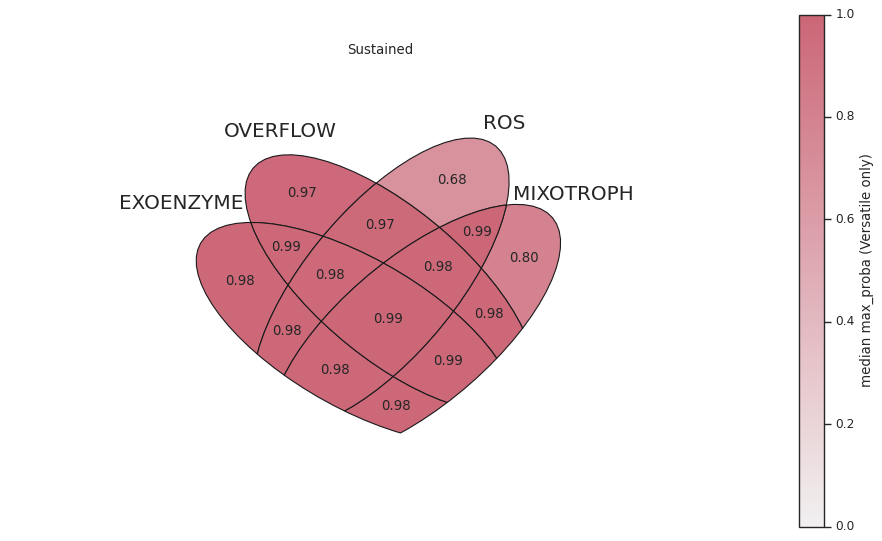

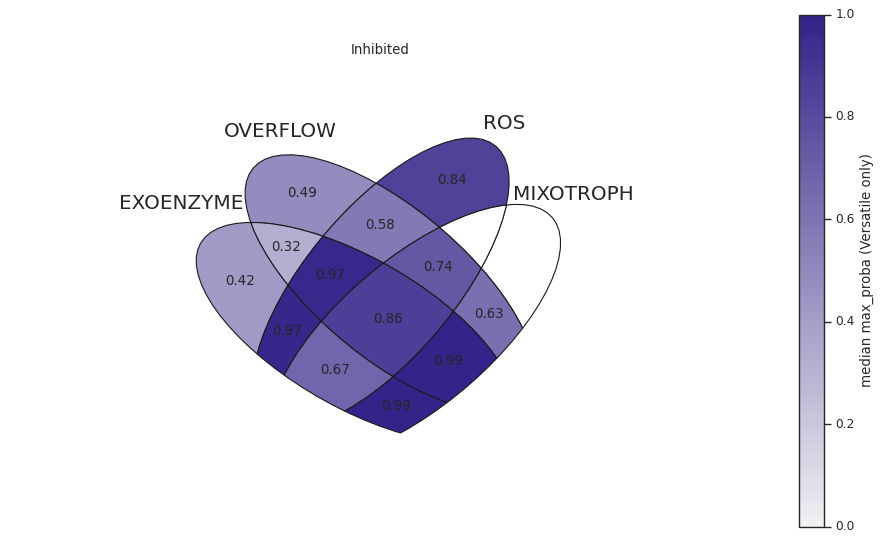

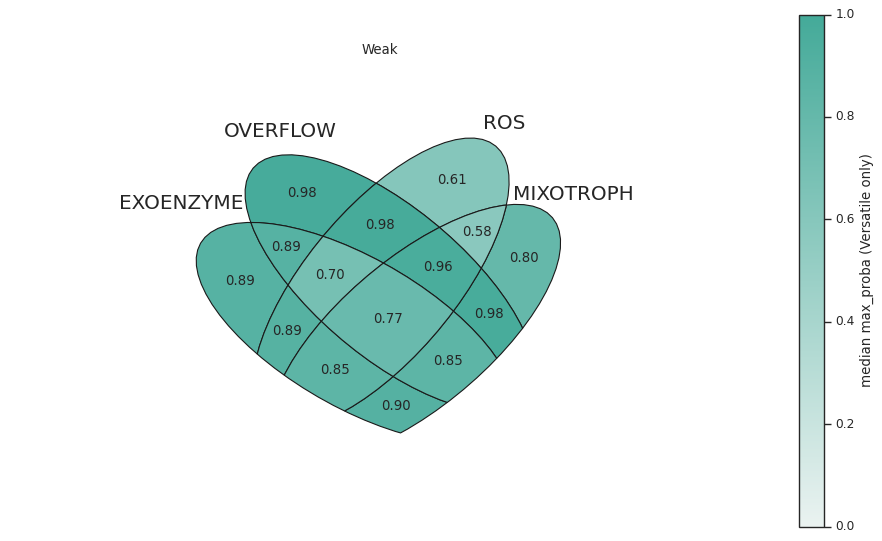

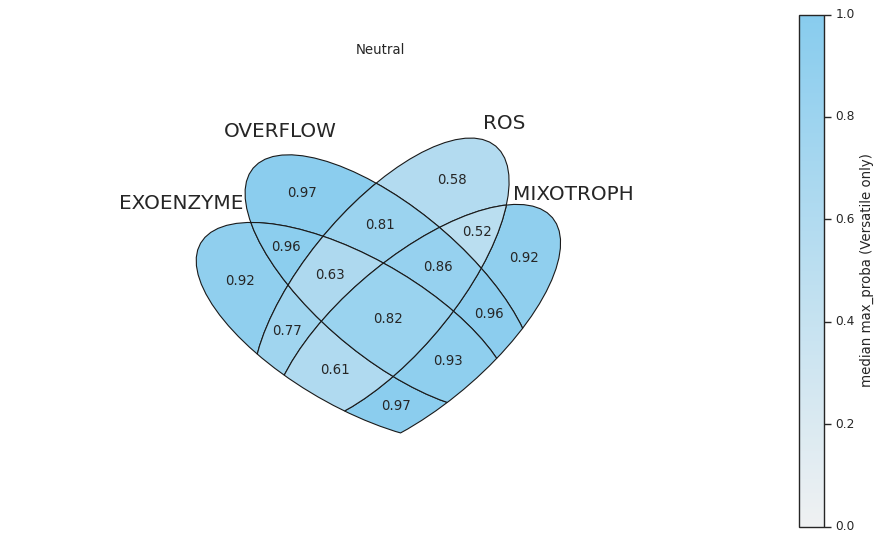

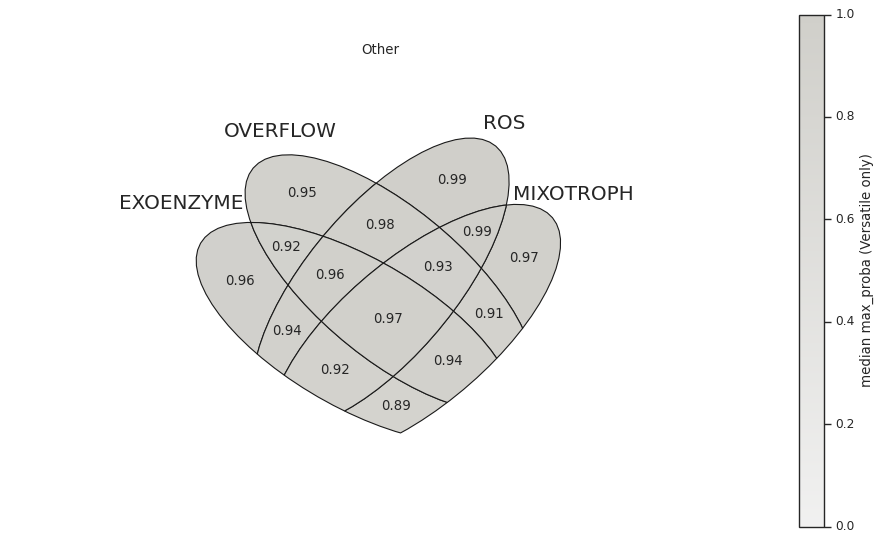

<Figure size 1200x640 with 0 Axes>

In [34]:
for i,c  in zip(gorder, gpalette):
    data_dict = pred_df.loc[pred_df.Versatile & pred_df.y_pred.isin([i])].groupby(morder)['max_prob'].median() 
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True), 
        data_dict=data_dict, vmin=0, vmax=1, 
        cbar_label=f'median max_proba (Versatile only)',
        annfmt='.2f'
    )
    plt.title(i)
    plt.show()
    save_fpath = os.path.join(save_dpath, f'exfig7_median_max_proba_{i}.svg')
    plt.savefig(save_fpath, format='svg', dpi=1200)            

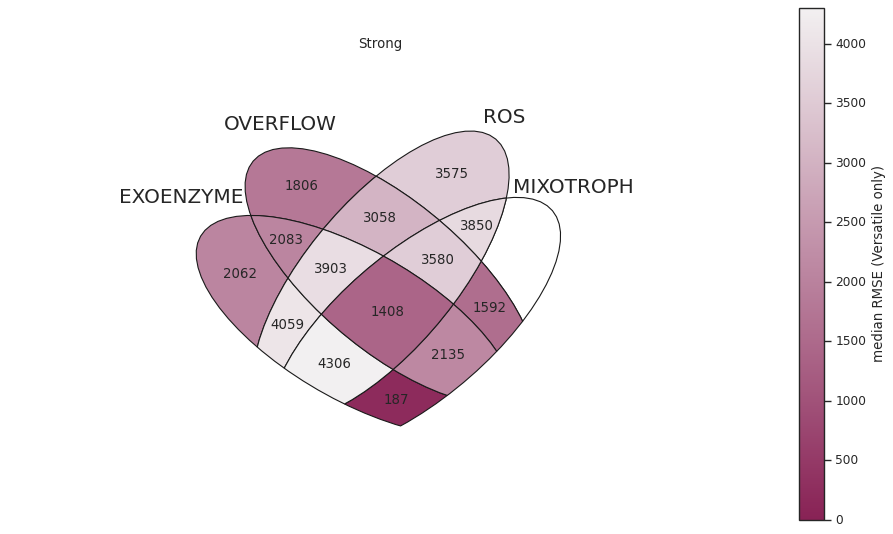

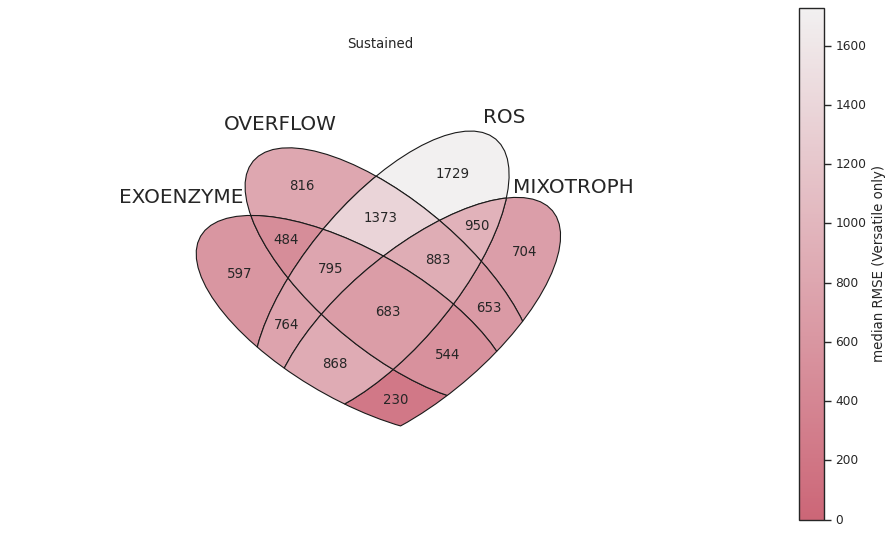

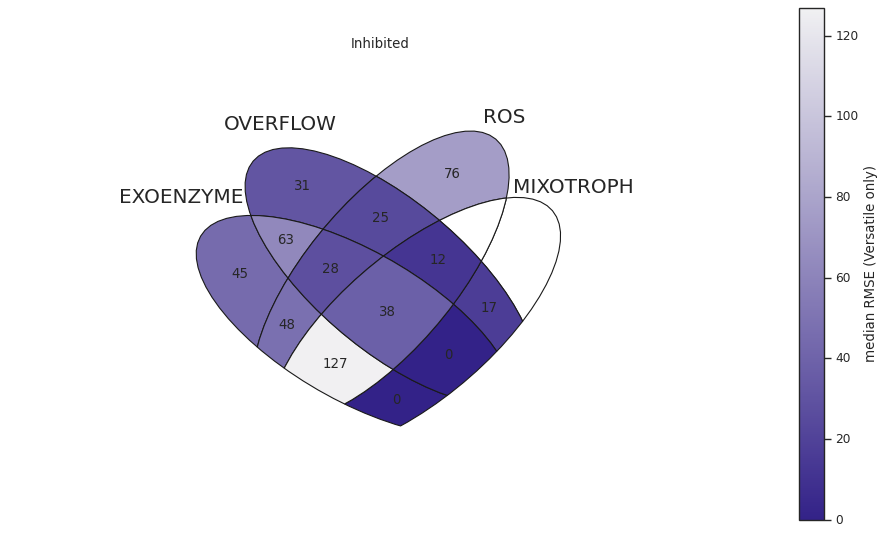

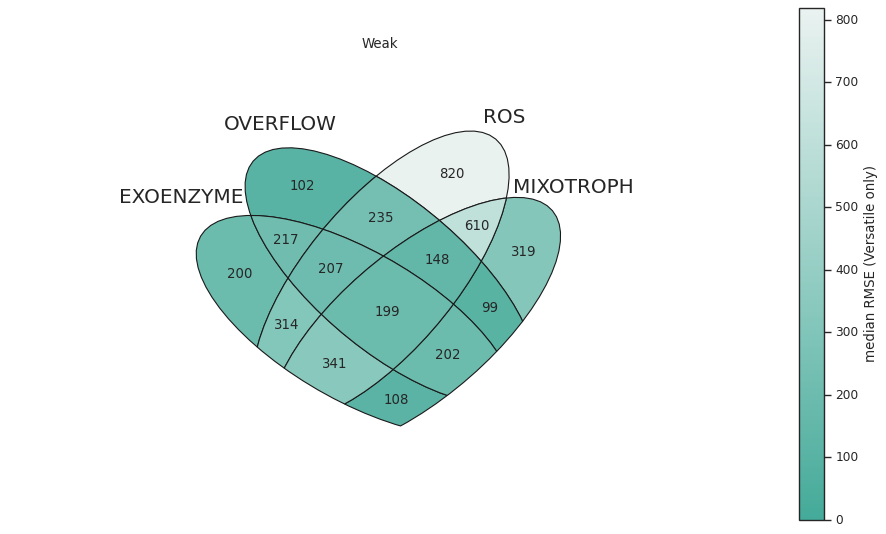

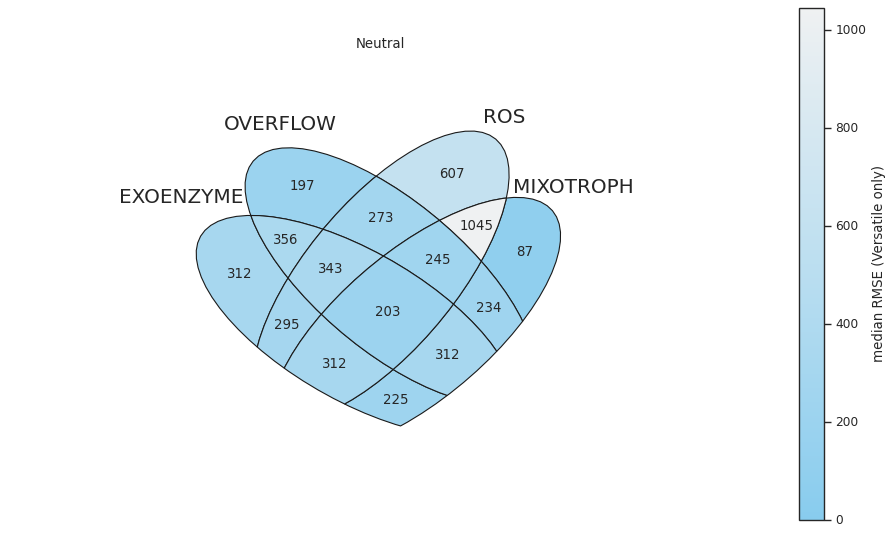

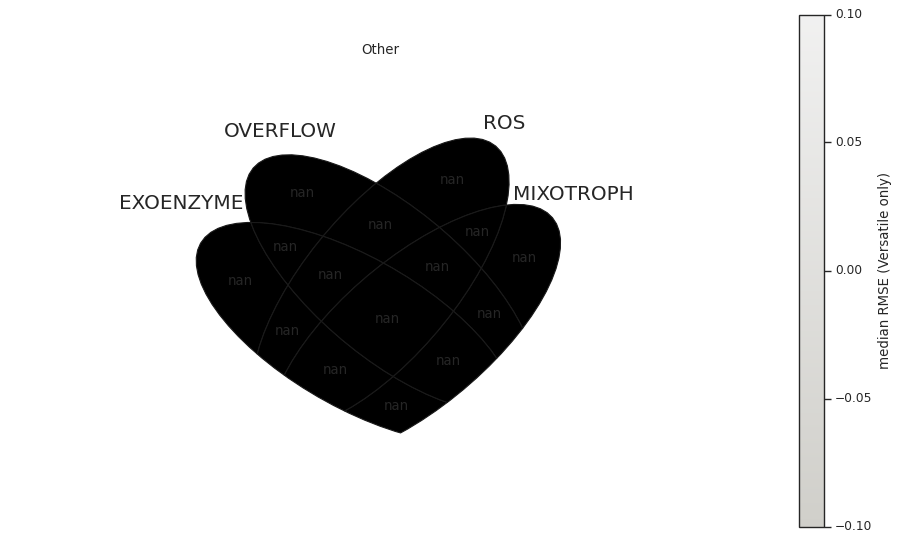

In [35]:
for i,c  in zip(gorder, gpalette):
    data_dict = pred_df.loc[pred_df.Versatile & pred_df.y_pred.isin([i])].groupby(morder)['RMSE'].median() 
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True, reverse=True), 
        data_dict=data_dict, vmin=0, #vmax=1, 
        cbar_label=f'median RMSE (Versatile only)',
        annfmt='.0f'
    )
    plt.title(i)
    plt.show()

In [36]:
pred_df.columns

Index(['run_id', 'y_pred', 'max_prob', 'idx', 'media', 'which', 'model',
       'hash', 'VPRO', 'Sample', 'full name', 'Group', 'RMSE_Bptotal[N]',
       'RMSE_Bptotal[C]', 'compare_points', 'RMSE', 'RMSE_filled', 'Phase',
       'Unnamed: 0', 'Versatile', 'MODEL', 'EXOENZYME', 'OVERFLOW', 'ROS',
       'MIXOTROPH'],
      dtype='object')

In [37]:
def _get_top_prob(x):
    # return top prob 
    if x['max_prob'].max() > 0.97:
        res = x.loc[x['max_prob'].ge(0.97)]
        if res.shape[0] >= 5:
             return x.loc[x['max_prob'].ge(0.97)]
    # else
    max_prob_threshold = x['max_prob'].max()*0.97
    return x.loc[x['max_prob'].ge(max_prob_threshold)]
    

In [38]:
topdf = pred_df.loc[pred_df.Versatile].groupby(['y_pred', 'MODEL', ]).apply(_get_top_prob).reset_index(drop=True)

In [39]:
topdf

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Sample,...,RMSE,RMSE_filled,Phase,Unnamed: 0,Versatile,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH
0,monte_rerun_het_extend_vpro_3_43_14_EXOENZYME_...,Inhibited,0.432139,monte_rerun_het_extend_vpro_3_43_14_EXOENZYME_...,lowN,all,EXOENZYME,h7858506243913481869,vpro_3_43_14_EXOENZYME_C3__15_EXOENZYME,3B0,...,25.197967,25.197967,extend,NaN,True,E,True,False,False,False
1,monte_rerun_het_add_vpro_79_6_EXOENZYME_C3_45_...,Inhibited,0.439000,monte_rerun_het_add_vpro_79_6_EXOENZYME_C3_45_...,lowN,all,EXOENZYME,h-2331266022682197718,vpro_79_6_EXOENZYME_C3_45,3B0,...,44.023583,44.023583,add,NaN,True,E,True,False,False,False
2,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,Inhibited,0.993156,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,lowN,all,EXOENZYME-MIXOTROPH,h3709587999053333207,vpro_3_14_0_EXOENZYME-MIXOTROPH__23_EXOENZYME-...,3A0,...,0.000000,0.000000,extend,NaN,True,EM,True,False,False,True
3,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,Inhibited,0.993156,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,lowN,all,EXOENZYME-MIXOTROPH,h3709587999053333207,vpro_3_14_0_EXOENZYME-MIXOTROPH__23_EXOENZYME-...,3A0,...,0.000000,0.000000,extend,NaN,True,EM,True,False,False,True
4,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,Inhibited,0.993156,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,lowN,all,EXOENZYME-MIXOTROPH,h3709587999053333207,vpro_3_14_0_EXOENZYME-MIXOTROPH__23_EXOENZYME-...,3A0,...,0.000000,0.000000,extend,NaN,True,EM,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201155,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,Weak,0.989866,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,lowN,all,ROS-MIXOTROPH,h-6166578601047733789,vpro_3_94_42_ROS-MIXOTROPH__10_ROS-MIXOTROPH,10C0,...,297.958765,297.958765,extend,NaN,True,RM,False,False,True,True
201156,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,Weak,0.977513,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,lowN,all,ROS-MIXOTROPH,h-6166578601047733789,vpro_3_94_42_ROS-MIXOTROPH__10_ROS-MIXOTROPH,10C0,...,299.412713,299.412713,extend,NaN,True,RM,False,False,True,True
201157,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,Weak,0.988376,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,lowN,all,ROS-MIXOTROPH,h-6166578601047733789,vpro_3_94_42_ROS-MIXOTROPH__10_ROS-MIXOTROPH,10C0,...,365.273524,365.273524,extend,NaN,True,RM,False,False,True,True
201158,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,Weak,0.970227,monte_rerun_het_extend_vpro_3_94_42_ROS-MIXOTR...,lowN,all,ROS-MIXOTROPH,h-6166578601047733789,vpro_3_94_42_ROS-MIXOTROPH__10_ROS-MIXOTROPH,10C0,...,314.809880,314.809880,extend,NaN,True,RM,False,False,True,True


In [40]:
topdf2 = topdf.groupby(['y_pred', 'MODEL',]).apply(lambda x : x.nsmallest(5, 'RMSE')).reset_index(drop=True)

In [41]:
pred_df.shape, topdf.shape, topdf2.shape

((1274085, 25), (201160, 25), (388, 25))

In [42]:
topdf2

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Sample,...,RMSE,RMSE_filled,Phase,Unnamed: 0,Versatile,MODEL,EXOENZYME,OVERFLOW,ROS,MIXOTROPH
0,monte_rerun_het_extend_vpro_3_43_14_EXOENZYME_...,Inhibited,0.432139,monte_rerun_het_extend_vpro_3_43_14_EXOENZYME_...,lowN,all,EXOENZYME,h7858506243913481869,vpro_3_43_14_EXOENZYME_C3__15_EXOENZYME,3B0,...,25.197967,25.197967,extend,NaN,True,E,True,False,False,False
1,monte_rerun_het_add_vpro_79_6_EXOENZYME_C3_45_...,Inhibited,0.439000,monte_rerun_het_add_vpro_79_6_EXOENZYME_C3_45_...,lowN,all,EXOENZYME,h-2331266022682197718,vpro_79_6_EXOENZYME_C3_45,3B0,...,44.023583,44.023583,add,NaN,True,E,True,False,False,False
2,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,Inhibited,0.993156,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,lowN,all,EXOENZYME-MIXOTROPH,h3709587999053333207,vpro_3_14_0_EXOENZYME-MIXOTROPH__23_EXOENZYME-...,3A0,...,0.000000,0.000000,extend,NaN,True,EM,True,False,False,True
3,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,Inhibited,0.993156,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,lowN,all,EXOENZYME-MIXOTROPH,h3709587999053333207,vpro_3_14_0_EXOENZYME-MIXOTROPH__23_EXOENZYME-...,3A0,...,0.000000,0.000000,extend,NaN,True,EM,True,False,False,True
4,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,Inhibited,0.993156,monte_rerun_het_extend_vpro_3_14_0_EXOENZYME-M...,lowN,all,EXOENZYME-MIXOTROPH,h3709587999053333207,vpro_3_14_0_EXOENZYME-MIXOTROPH__23_EXOENZYME-...,3A0,...,0.000000,0.000000,extend,NaN,True,EM,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,Weak,0.989979,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,lowN,all,ROS-MIXOTROPH,h-558519130856011054,vpro_3_83_8_ROS-MIXOTROPH__72_ROS-MIXOTROPH,10C0,...,103.141664,103.141664,extend,NaN,True,RM,False,False,True,True
384,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,Weak,0.989950,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,lowN,all,ROS-MIXOTROPH,h-558519130856011054,vpro_3_83_8_ROS-MIXOTROPH__72_ROS-MIXOTROPH,10C0,...,110.524662,110.524662,extend,NaN,True,RM,False,False,True,True
385,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,Weak,0.990009,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,lowN,all,ROS-MIXOTROPH,h-558519130856011054,vpro_3_83_8_ROS-MIXOTROPH__72_ROS-MIXOTROPH,10C0,...,112.395443,112.395443,extend,NaN,True,RM,False,False,True,True
386,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,Weak,0.990002,monte_rerun_het_extend_vpro_3_83_8_ROS-MIXOTRO...,lowN,all,ROS-MIXOTROPH,h-558519130856011054,vpro_3_83_8_ROS-MIXOTROPH__72_ROS-MIXOTROPH,10C0,...,113.843098,113.843098,extend,NaN,True,RM,False,False,True,True


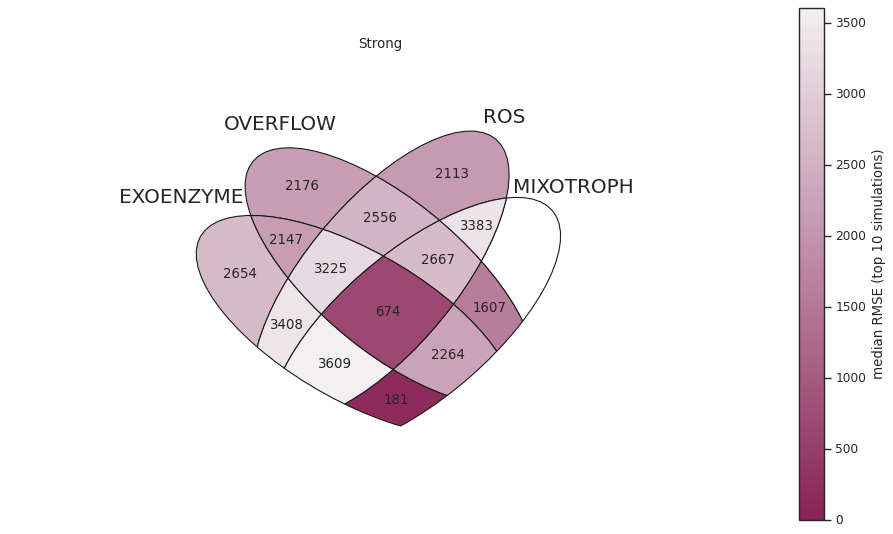

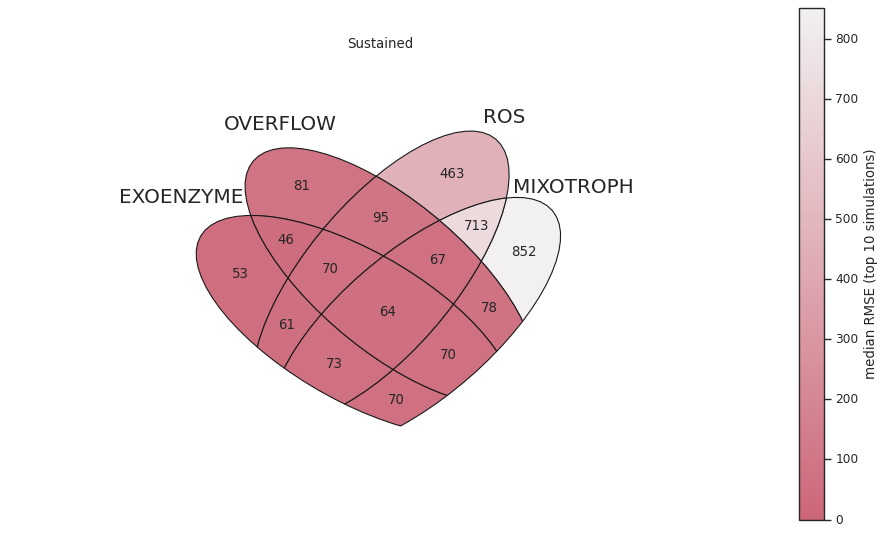

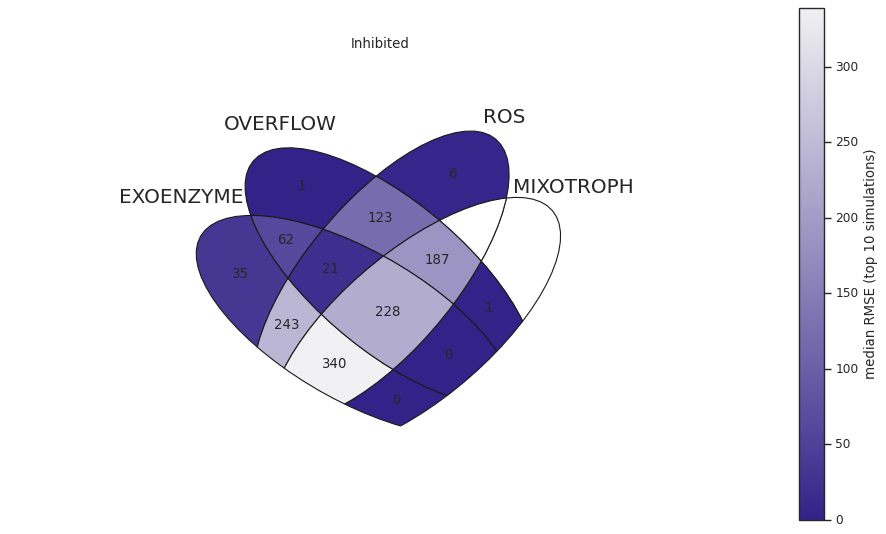

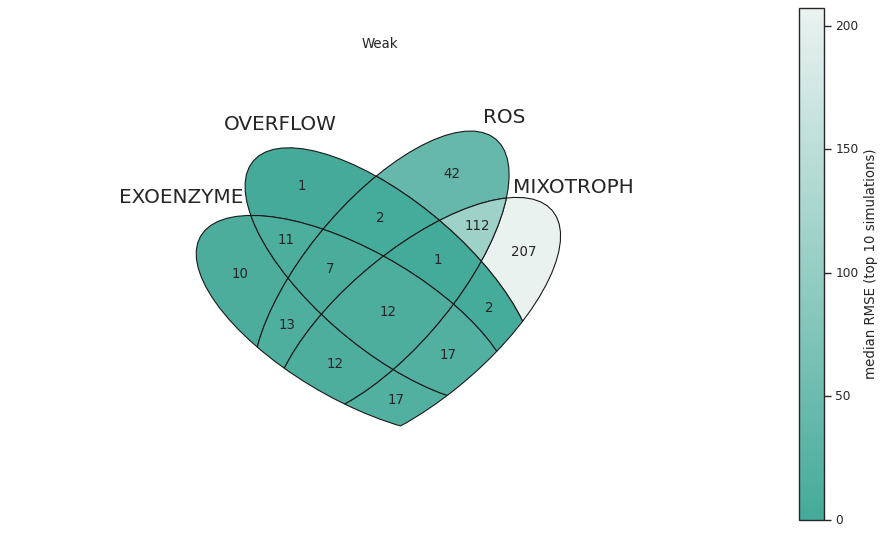

In [43]:
for i,c  in zip(gorder[:4], gpalette[:4]):
    data_dict = topdf2.loc[#topdf2.Versatile & 
                        topdf2.y_pred.isin([i])].groupby(morder)['RMSE'].median() 
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True, reverse=True), 
        data_dict=data_dict, vmin=0, #vmax=1, 
        cbar_label=f'median RMSE (top 10 simulations)',
        annfmt='.0f'
    )
    plt.title(i)
    plt.show()

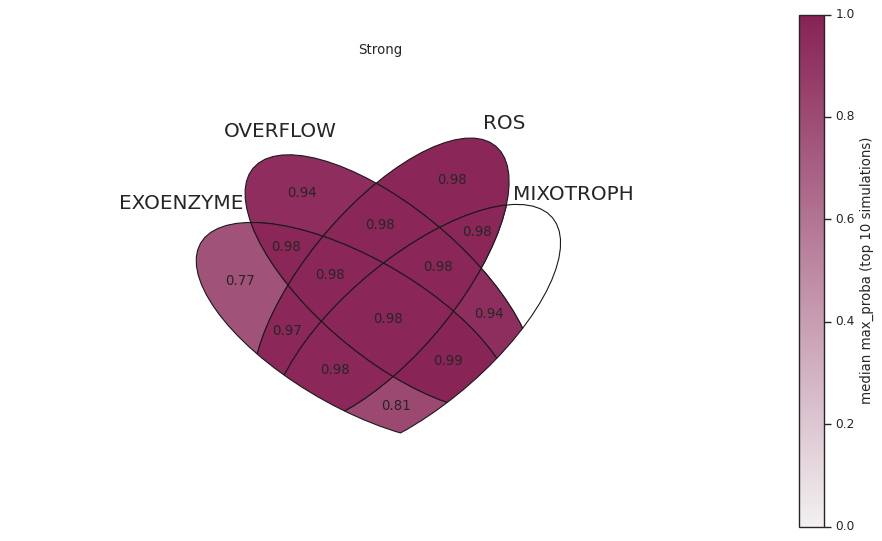

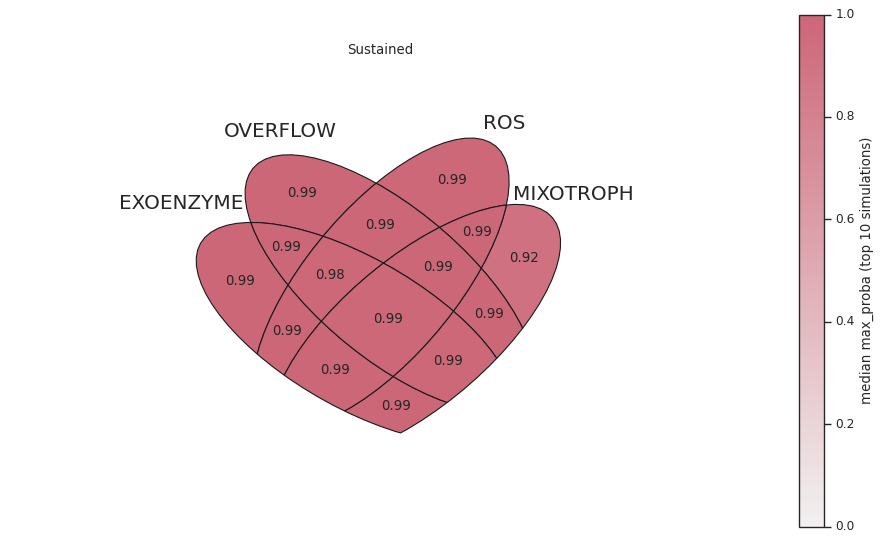

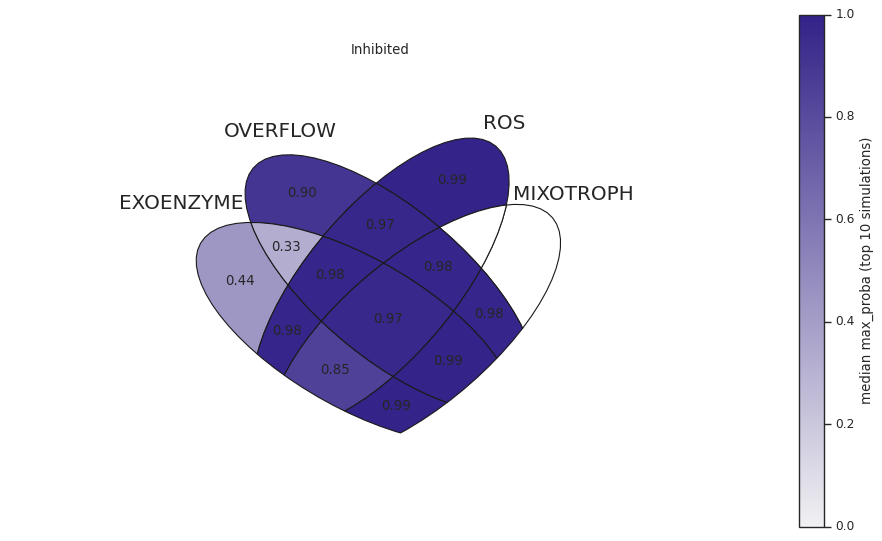

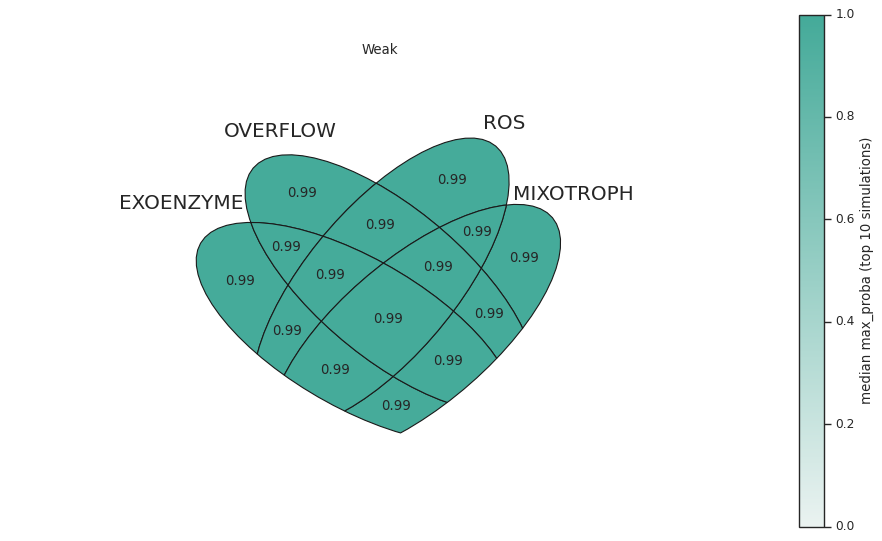

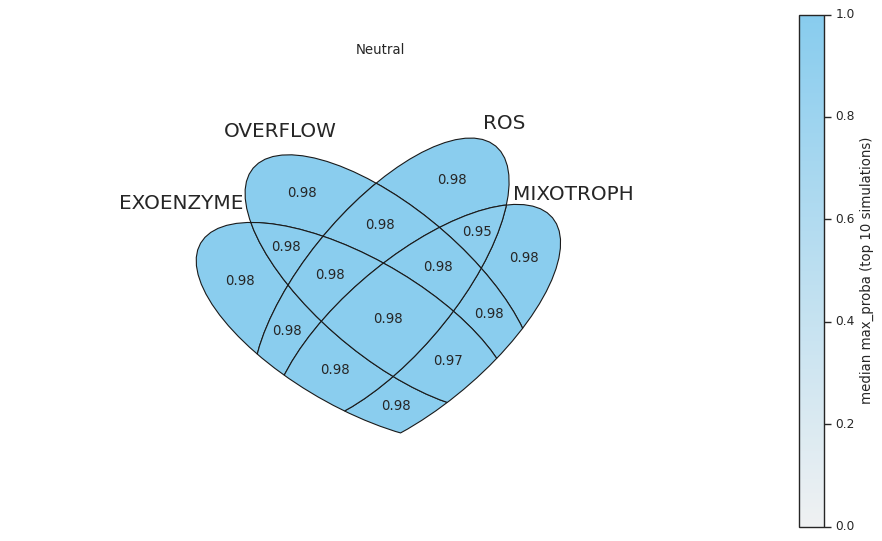

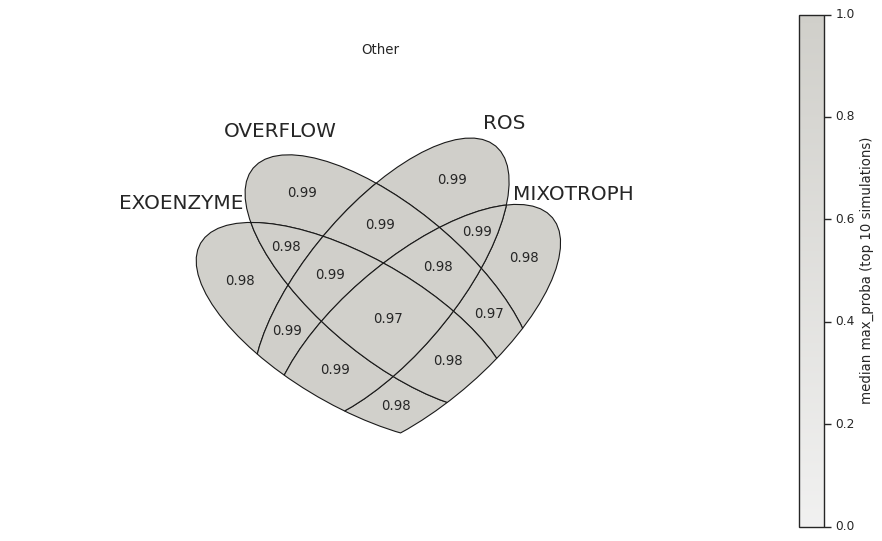

In [44]:
for i,c  in zip(gorder, gpalette):
    data_dict = topdf2.loc[topdf2.Versatile & topdf2.y_pred.isin([i])].groupby(morder)['max_prob'].median() 
    multimodel_venn.multimodel_venn(
        morder, cmap=sns.light_palette(c, n_colors=16, as_cmap=True), 
        data_dict=data_dict, vmin=0, vmax=1, 
        cbar_label=f'median max_proba (top 10 simulations)',
        annfmt='.2f'
    )
    plt.title(i)
    plt.show()

In [45]:
topsamples = topdf2.loc[topdf2.y_pred.isin(gorder[:5])].pivot_table(index='MODEL', columns='y_pred', values='full name', 
                   aggfunc=np.unique)[gorder[:5]]
topsamples

y_pred,Strong,Sustained,Inhibited,Weak,Neutral
MODEL,,,,,
E,[Pseudoalteromonas haloplanktis],[Sulfitobacter pseudonitzschiae],[Marinobacter adhaerens HP15],[Roseovarius 5C3],[Axenic]
EM,[Pseudoalteromonas haloplanktis],[Sulfitobacter pseudonitzschiae],[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
EO,[A. macleodii ATCC27126],[Sulfitobacter pseudonitzschiae],[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
EOM,[A. macleodii ATCC27126],[Sulfitobacter pseudonitzschiae],[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
EOR,[A. macleodii ATCC27126],"[Ruegeria pomeroyi, Sulfitobacter pseudonitzsc...",[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
EORM,[A. macleodii ATCC27126],[Ruegeria pomeroyi],[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
ER,[A. macleodii ATCC27126],[Sulfitobacter pseudonitzschiae],[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
ERM,[A. macleodii ATCC27126],[Sulfitobacter pseudonitzschiae],[Marinobacter adhaerens HP15],"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]
M,NaN,[Ruegeria pomeroyi],NaN,"[Marinovum 5F3, Roseovarius 5C3]",[Axenic]


In [46]:
topdf2.loc[topdf2.y_pred.isin(gorder[:5])].pivot_table(index='MODEL', columns='y_pred', values='full name', 
                   aggfunc='count')[gorder[:5]]


y_pred,Strong,Sustained,Inhibited,Weak,Neutral
MODEL,,,,,
E,1.0,5.0,2.0,5.0,5.0
EM,1.0,5.0,5.0,5.0,5.0
EO,2.0,5.0,1.0,5.0,5.0
EOM,1.0,5.0,5.0,5.0,5.0
EOR,5.0,5.0,3.0,5.0,5.0
EORM,5.0,5.0,1.0,5.0,5.0
ER,5.0,5.0,4.0,5.0,5.0
ERM,5.0,5.0,1.0,5.0,5.0
M,NaN,3.0,NaN,5.0,5.0


In [47]:
topdf2.to_csv('predicted_classes_top_samples.csv.gz', index=False)